2 1
1 1
2
[2]
[-6, -2, 2, 4, 6]

[1]
1 1
3 -1
[5, 3, 1, -1, -3]
-7 4  =  8.06225774829855
-3 4  =  5.0
1 4  =  4.123105625617661
3 4  =  5.0
5 4  =  6.4031242374328485
-7 2  =  7.280109889280518
selcted  -3 2 for  2
-3 2  =  3.605551275463989
selcted  1 2 for  1
1 2  =  2.23606797749979
selcted  3 2 for  1
3 2  =  3.605551275463989
5 2  =  5.385164807134504
-7 0  =  7.0
selcted  -3 0 for  0
-3 0  =  3.0
selcted  1 0 for  0
1 0  =  1.0
selcted  3 0 for  0
3 0  =  3.0
5 0  =  5.0
-7 -2  =  7.280109889280518
selcted  -3 -2 for  3
-3 -2  =  3.605551275463989
selcted  1 -2 for  4
1 -2  =  2.23606797749979
selcted  3 -2 for  4
3 -2  =  3.605551275463989
5 -2  =  5.385164807134504
-7 -4  =  8.06225774829855
-3 -4  =  5.0
1 -4  =  4.123105625617661
3 -4  =  5.0
5 -4  =  6.4031242374328485
7


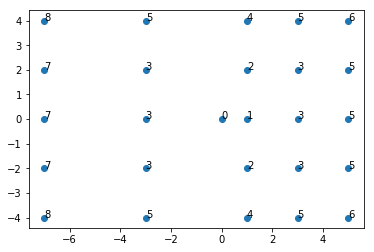

In [90]:

dimensions = [3, 2]
captain_position = [1, 1]
badguy_position = [2, 1]
distance = 4


# dimensions = [300, 275]
# captain_position = [150, 150]
# badguy_position = [180, 100]
# distance = 500


import math

def swap(a,b):
    return b, a

def quad(x, y):
    if x == 0 or y == 0:
        return 0
    elif x > 0 and y > 0:
        return 1
    elif x < 0 and y > 0:
        return 2
    elif x < 0 and y < 0:
        return 3
    else:
        return 4

def answer(dim = [], captain = [], enemy = [], distance = 0):
    left, right = enemy[0] , dim[0] - enemy[0]
    top, bottom = enemy[1] , dim[1] - enemy[1]
    
    iteration_count = math.ceil(max(dim[0]/distance, dim[1]/distance)) + 1
    print(left, right)
    print(top, bottom)
    print(iteration_count)
    
    
    
    if iteration_count % 2 == 1:
        left, right = swap(left, right)
        top, bottom = swap(top, bottom)
        

    x = 0
    y = 1
    px = [enemy[x]]
    print(px)
    count = 1
    for i in range(iteration_count):
        new_left = px[0]
        new_right = px[count - 1]
        new_left -= (2*left)
        new_right += (2*right)
        px = [new_left] + px + [new_right]
        count += 2
    print(px)
    print()
    
    py = [enemy[y]]
    print(py)
    count = 1
    for i in range(iteration_count):
        new_top = py[0]
        new_bottom = py[count - 1]
        print(new_top, new_bottom)
        new_top += (2*top)
        
        new_bottom -= (2*bottom)
        py = [new_top] + py + [new_bottom]
      
        top, bottom = swap(top, bottom)
        count += 2
    
    print(py)
    size = 2 * iteration_count + 1
    mat = [{} for i in range(5)]
    temp = []
    for i in py:
        row = []
        for j in px:
            
            cx , cy = [j - captain[x],i - captain[y]]
            dist = math.sqrt(cy**2 + cx**2)
            if dist <= distance:
                q = quad(cx,cy)
                print("selcted ",cx,cy, "for ",q)
                if q == 0:
                    mat[q]["undefined"] = dist
                else:
                    mat[q][str(cy/cx)] = dist
            
            print(cx, cy, " = ", dist)
            row += [[cx,cy]]
        temp.append(row)
        
    count = 0
    for val in mat:
        count += len(val)
    print(count)
    xs = [0]
    ys = [0]
    for i in temp:
        for j in i:
            xs += [j[0]]
            ys += [j[1]]
    fig, ax = plt.subplots()

    ax.scatter(xs,ys)
    for i, _ in enumerate(xs):
        x = xs[i]
        y = ys[i]
        dist = math.sqrt( math.pow(y,2.0) + math.pow(x, 2.0))
        dist = int(dist)
        ax.annotate(str(dist), (x,y))
    plt.show()
    
answer(dimensions, captain_position, badguy_position, distance)
        